Nome: César Augusto Julio da Silva \\
DRE: 116151713 \\



## **Roteiro da Prova**

Utilize o dataset Iris com todas as 150 instâncias.
1. separe 10% do dataset (15 instâncias, sendo 5 de cada classe) que serão usadas posteriormente.
2. para os 90% restantes, você vai usar K-fold com K = 5.
3. Inicialmente, utilize todas as variávéis de entrada do dataset.
4. utilize o classificador multi perceptron MLPClassifier
(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
com os seguintes valores:
- 1 camada escondida com 2 neurônios
- número máximo de iterações: 500
- identity
- solver: adam
5. Para cada fold:
- informe o score de treinamento e teste
- plote um gráfico com o comportamento da função de perda. Você pode plotar em um gráfico só, todas as funções de perda.
6. Analise o que ocorreu.
7. Ainda usando os 90% dos dados e K-fold=5, repita o experimento alterados os parâmetros anteriores. A escolha de qual(is) parâmetro(s) será(ão) alterados deve ser justificado. O que você espera alterando o(s) parâmetro(s)? O resultado obtido foi o esperado?
8. Após terminar todos os experientos, escolha o modelo gerado que você considera o melhor resultado. Usando os parâmetros deste modelo, faça um novo treinamento usando todos os 90% dos dados.
9. Avalie o modelo gerado no item 8 usando as 15 instâncias que não foram usadas.
10. O que entregar?
Vocẽ deve entregar o colab que você usou e um relatório discutindo os resultados. ATENÇÃO: o relatório NÃO deve ser uma cópia do colab. Nele você deve colocar apenas os resultados mais importantes e suas respectivas análises.

Esta tarefa é individual e conforme combinado na última aula valerá como uma prova.

Não serão aceitos trabalhos entregues fora do prazo.


## **Teste Inicial**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import pandas as pd
import warnings

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.731481        0.703704      0.510589
1  2              0.851852        0.851852      0.489160
2  3              0.842593        0.740741      0.475293
3  4              0.861111        0.740741      0.483593
4  5              0.814815        0.962963      0.513673



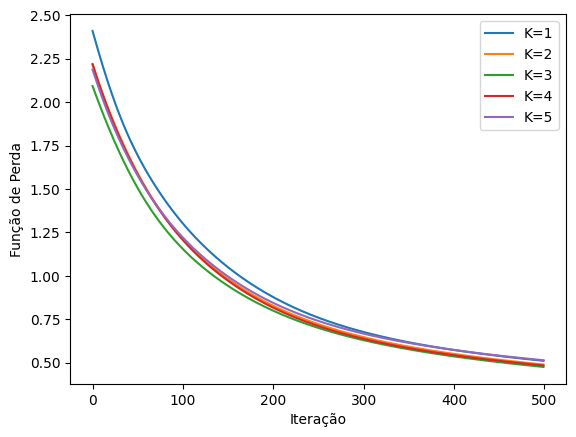

In [ ]:
#Carregando os dados
iris = load_iris()
x = iris.data
y = iris.target

r_state = 100

#Separação de 10% para teste (random_state = 100, para efeitos de reprodutibilidade)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=r_state)

#Divisão de k = 5
kf = KFold(n_splits=5, shuffle = True, random_state=r_state)

#Utilização do classificador multi perceptron
clf = MLPClassifier(hidden_layer_sizes = (2,), max_iter=500, activation='identity', solver='adam', random_state=r_state)

#Coloquei isso só para remover o "Convergence Warning"
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  #Dados para os gráficos das funções de perda
  losses_data = []

  #Listas para exibir o dataframe
  scores_train = []
  scores_test = []
  losses = []
  df = pd.DataFrame()

  #Para cada fold, informar score de treinamento e teste
  for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

    clf.fit(x_train[train_i], y_train[train_i])

    #Score de Treinamento
    score_train = clf.score(x_train[train_i], y_train[train_i])
    scores_train.append(score_train)

    #Score de Teste
    score_test = clf.score(x_train[test_i], y_train[test_i])
    scores_test.append(score_test)

    #Guarda cada curva de perda
    losses_data.append(clf.loss_curve_)

    #Ultima perda registrada
    losses.append(clf.loss_)

  #Um dataframe criado para exibir os dados de uma forma mais organizada
  df = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
  print(df)
  print()

  #Grafico da Curva de Perda
  for i, loss_curve in enumerate(losses_data):
    plt.plot(loss_curve, label=f"K={i+1}")
  plt.xlabel("Iteração")
  plt.ylabel("Função de Perda")
  plt.legend()
  plt.show()


É possível observar que a função de perda converge em todos os K's para aproximadamente 0.5 (um meio).

## **Alteração dos parâmetros**



1.   Modificação do número de iterações
2.   Modificação do número de neurônios (mantendo somente uma camada)
3.   Modificação do número de camadas (mantendo somente dois neurônios)



### **Modificação do Número de Iterações**

In [ ]:
#Primeira mudanca, modificar numero de iteracoes
iterations = [100, 1000, 10000, 100000]

dfs = []

for iter in iterations:
  clf = MLPClassifier(hidden_layer_sizes = (2,), max_iter=iter, activation='identity', solver='adam', random_state=r_state)

  with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    scores_train = []
    scores_test = []
    losses = []
    df = pd.DataFrame()

    for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

      clf.fit(x_train[train_i], y_train[train_i])

      #Score de Treinamento
      score_train = clf.score(x_train[train_i], y_train[train_i])
      scores_train.append(score_train)

      #Score de Teste
      score_test = clf.score(x_train[test_i], y_train[test_i])
      scores_test.append(score_test)

      #Ultima perda registrada
      losses.append(clf.loss_)

    df = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
    dfs.append([iter, df])

#Dataframes sao exibidos por cada iteracao (parametro modificado)
for iter, df in dfs:
  print(f"\nNumero de Iteracoes: {iter}\n")
  print(df)
  print()


Numero de Iteracoes: 100

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.324074        0.518519      1.306895
1  2              0.379630        0.370370      1.217762
2  3              0.407407        0.259259      1.159064
3  4              0.361111        0.407407      1.211018
4  5              0.388889        0.296296      1.225120


Numero de Iteracoes: 1000

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.935185        0.925926      0.345125
1  2              0.944444        0.925926      0.319323
2  3              0.935185        0.888889      0.301115
3  4              0.925926        0.888889      0.317847
4  5              0.925926        1.000000      0.346879


Numero de Iteracoes: 10000

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.972222        0.962963      0.161179
1  2              0.962963        0.962963      0.141851
2  3              0.972222        0.962963      0.131627
3 

### **Modificação do Número de Neurônios**


Numero de Neuronios: 2

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.731481        0.703704      0.510589
1  2              0.851852        0.851852      0.489160
2  3              0.842593        0.740741      0.475293
3  4              0.861111        0.740741      0.483593
4  5              0.814815        0.962963      0.513673


Numero de Neuronios: 8

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.925926        0.962963      0.412755
1  2              0.981481        0.962963      0.368213
2  3              0.972222        0.925926      0.349110
3  4              0.962963        0.962963      0.363830
4  5              0.981481        0.962963      0.415864


Numero de Neuronios: 32

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.972222        0.962963      0.242247
1  2              0.972222        0.962963      0.222408
2  3              0.972222        0.925926      0.207406
3  4      

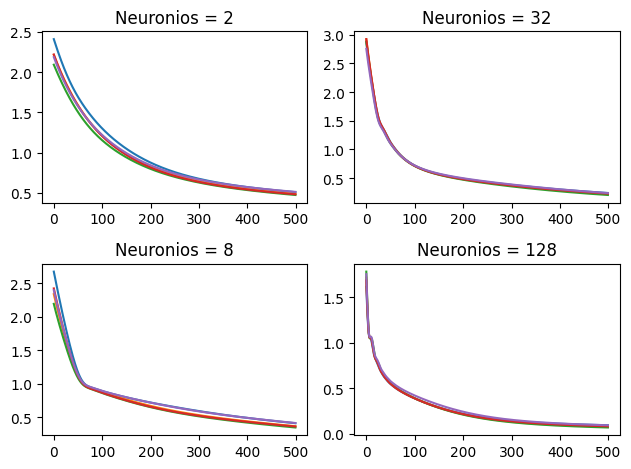

In [ ]:
#Modificacao do numero de neuronios

neurons = [2, 8, 32, 128]

dfs =[]
losses_tests = []

for neuron in neurons:
  clf = MLPClassifier(hidden_layer_sizes = (neuron,), max_iter=500, activation='identity', solver='adam', random_state=r_state)

  #Coloquei isso só para remover o "Convergence Warning"
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    scores_train = []
    scores_test = []
    losses = []
    df = pd.DataFrame()

    #Dados extras para grafico
    losses_curves = []

    #Para cada fold, informar score de treinamento e teste
    for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

      clf.fit(x_train[train_i], y_train[train_i])

      #Score de Treinamento
      score_train = clf.score(x_train[train_i], y_train[train_i])
      scores_train.append(score_train)

      #Score de Teste
      score_test = clf.score(x_train[test_i], y_train[test_i])
      scores_test.append(score_test)

      #Ultima perda registrada
      losses.append(clf.loss_)

      #Curva de perda
      losses_curves.append(clf.loss_curve_)

    df = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
    dfs.append([neuron, df])
    losses_tests.append(losses_curves)

for neuron, df in dfs:
  print(f"\nNumero de Neuronios: {neuron}\n")
  print(df)
  print()


#Graficos das Curvas de Perda
fig, axs = plt.subplots(2, 2)
for k, loss_curve in enumerate(losses_tests[0]):
  axs[0, 0].plot(loss_curve)
axs[0, 0].set_title("Neuronios = 2")
for k, loss_curve in enumerate(losses_tests[1]):
  axs[1, 0].plot(loss_curve)
axs[1, 0].set_title("Neuronios = 8")
for k, loss_curve in enumerate(losses_tests[2]):
  axs[0, 1].plot(loss_curve)
axs[0, 1].set_title("Neuronios = 32")
for k, loss_curve in enumerate(losses_tests[3]):
  axs[1, 1].plot(loss_curve)
axs[1, 1].set_title("Neuronios = 128")
fig.tight_layout()



### **Modificação do Número de Camadas**

In [ ]:
#Modificacao do numero de camadas
layers = [1, 2, 3, 4]

dfs =[]

for layer in layers:
  clf = MLPClassifier(hidden_layer_sizes = (2,)*layer, max_iter=500, activation='identity', solver='adam', random_state=r_state)

  with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    scores_train = []
    scores_test = []
    losses = []
    df = pd.DataFrame()

    #Para cada fold, informar score de treinamento e teste
    for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

      clf.fit(x_train[train_i], y_train[train_i])

      #Score de Treinamento
      score_train = clf.score(x_train[train_i], y_train[train_i])
      scores_train.append(score_train)

      #Score de Teste
      score_test = clf.score(x_train[test_i], y_train[test_i])
      scores_test.append(score_test)

      #Ultima perda registrada
      losses.append(clf.loss_)

    df = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
    dfs.append([layer, df])

for layer, df in dfs:
  print(f"\nNumero de Camadas: {layer}\n")
  print(df)
  print()


Numero de Camadas: 1

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.731481        0.703704      0.510589
1  2              0.851852        0.851852      0.489160
2  3              0.842593        0.740741      0.475293
3  4              0.861111        0.740741      0.483593
4  5              0.814815        0.962963      0.513673


Numero de Camadas: 2

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.666667        0.629630      0.642784
1  2              0.629630        0.555556      0.648019
2  3              0.611111        0.629630      0.656787
3  4              0.611111        0.740741      0.659660
4  5              0.638889        0.518519      0.652534


Numero de Camadas: 3

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.638889        0.555556      0.709882
1  2              0.759259        0.814815      0.653959
2  3              0.824074        0.740741      0.618219
3  4             

## **Melhor resultado**



### **Comparando os melhores casos de cada teste**

In [ ]:
#Modificacao do numero de camadas
clf = MLPClassifier(hidden_layer_sizes = (2,), max_iter=10000, activation='identity', solver='adam', random_state=r_state)

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  scores_train = []
  scores_test = []
  losses = []

  #Para cada fold, informar score de treinamento e teste
  for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

    clf.fit(x_train[train_i], y_train[train_i])

    #Score de Treinamento
    score_train = clf.score(x_train[train_i], y_train[train_i])
    scores_train.append(score_train)

    #Score de Teste
    score_test = clf.score(x_train[test_i], y_train[test_i])
    scores_test.append(score_test)

    #Ultima perda registrada
    losses.append(clf.loss_)

  df1 = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
  print(f"\nNumero de Iterações: 10000\n")
  print(df1)
  print()


  #Modificacao do numero de camadas
  clf = MLPClassifier(hidden_layer_sizes = (128,), max_iter=500, activation='identity', solver='adam', random_state=r_state)

  scores_train = []
  scores_test = []
  losses = []

  #Para cada fold, informar score de treinamento e teste
  for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

    clf.fit(x_train[train_i], y_train[train_i])

    #Score de Treinamento
    score_train = clf.score(x_train[train_i], y_train[train_i])
    scores_train.append(score_train)

    #Score de Teste
    score_test = clf.score(x_train[test_i], y_train[test_i])
    scores_test.append(score_test)

    #Ultima perda registrada
    losses.append(clf.loss_)

  df2 = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
  print(f"\nNumero de Neuronios: 128\n")
  print(df2)
  print()


  #Modificacao do numero de camadas
  clf = MLPClassifier(hidden_layer_sizes = (2,2,2,2,), max_iter=500, activation='identity', solver='adam', random_state=r_state)

  scores_train = []
  scores_test = []
  losses = []

  #Para cada fold, informar score de treinamento e teste
  for i, (train_i, test_i) in enumerate(kf.split(x_train, y_train)):

    clf.fit(x_train[train_i], y_train[train_i])

    #Score de Treinamento
    score_train = clf.score(x_train[train_i], y_train[train_i])
    scores_train.append(score_train)

    #Score de Teste
    score_test = clf.score(x_train[test_i], y_train[test_i])
    scores_test.append(score_test)

    #Ultima perda registrada
    losses.append(clf.loss_)

  df3 = pd.DataFrame(data={"K": list(range(1,6)), "Score de Treinamento": scores_train, "Score de Teste": scores_test, "Ultima Perda": losses})
  print(f"\nNumero de Camadas: 4\n")
  print(df3)
  print()


Numero de Iterações: 10000

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.972222        0.962963      0.161179
1  2              0.962963        0.962963      0.141851
2  3              0.972222        0.962963      0.131627
3  4              0.972222        0.925926      0.147076
4  5              0.953704        1.000000      0.153750


Numero de Neuronios: 128

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.972222        1.000000      0.094347
1  2              0.990741        0.925926      0.078112
2  3              0.990741        0.962963      0.069548
3  4              0.981481        0.925926      0.082279
4  5              0.972222        1.000000      0.093883


Numero de Camadas: 4

   K  Score de Treinamento  Score de Teste  Ultima Perda
0  1              0.814815        0.666667      0.469709
1  2              0.925926        0.925926      0.466874
2  3              0.898148        0.814815      0.454462
3  4   

### **Executando o melhor caso**

In [ ]:
#Modificacao do numero de camadas
clf = MLPClassifier(hidden_layer_sizes = (2,2,2,2,), max_iter=500, activation='identity', solver='adam', random_state=r_state)

with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  #Execução do teste final
  clf.fit(x_train, y_train)
  test_score = clf.score(x_test, y_test)
  print(test_score)

1.0
